Basic information about `seaborn` and examples showing how to get a few common tasks done.

Sources:
* [seaborn API reference](http://seaborn.pydata.org/api.html)
* [elitedatascience seaborn tutorial](https://elitedatascience.com/python-seaborn-tutorial)
* [The Python Graph Gallery](https://python-graph-gallery.com/)
* [Hexagonal Binning](https://www.meccanismocomplesso.org/en/hexagonal-binning-a-new-method-of-visualization-for-data-analysis/)
* A couple of your Kaggle notebooks

In [1]:
import pandas as pd
# import matplotlib to enable detailed customisations of plots
from matplotlib import pyplot as plt
# use interactive plots
%matplotlib notebook

# Overview

Why would you want to use `seaborn` instead of `matplotlib`? Apparently, `seaborn` allows you to prepare better looking plots with less code than `matplotlib` does and it uses `matplotplib` under the hood.

# Sample datasets

## Pokemon

In [2]:
df_pokemon = pd.read_csv("data/Pokemon.csv", index_col=0, encoding="ISO-8859-1")
df_pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


# Importing seaborn

In [3]:
import seaborn as sns

# Utility functions

In [4]:
def cleanup():
    for fignum in plt.get_fignums():
        plt.close(fignum)

# Plotting a scatter plot

There is no dedicated scatter plot in `seaborn`. Instead, we can fit a regression model to our data using the `lmplot` method.

/anaconda3/envs/py362scipy/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


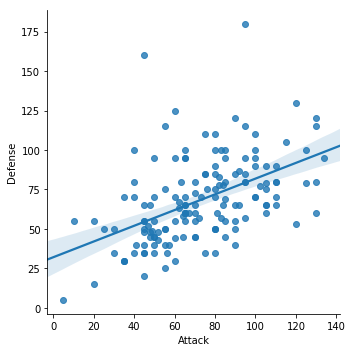

In [5]:
# recommended way of using lmplot
# specify the DataFrame to act as the data and then specify the
# names of the columns to serve as the x-axis and y-axis
sns.lmplot(x="Attack", y="Defense", data=df_pokemon)

The solid line in the above plot is the regression model. The highlighted area indicates a confidence interval for the regression estimate. We can remove the translucent bands by setting `ci=None`. 

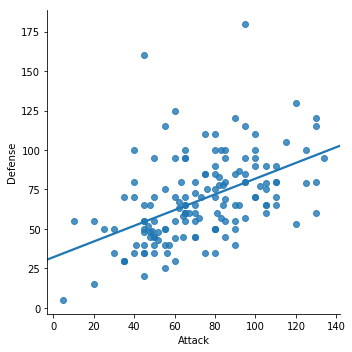

In [6]:
sns.lmplot(x="Attack", y="Defense", data=df_pokemon,
          ci=None)

Similarly, we can remove the linear regression line from the plot.

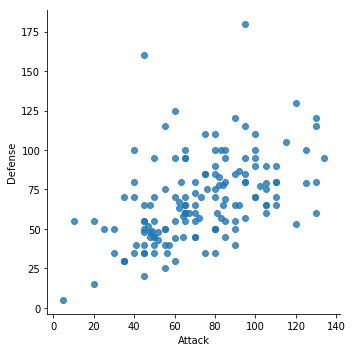

In [7]:
sns.lmplot(x="Attack", y="Defense", data=df_pokemon,
          fit_reg=False)

# Displaying categorical information in a scatter plot

We can add a categorical variable as another dimension to the scatter plot.

In the following example, we track Attack versus Defense and display the categorical variable `Stage` using different colours.

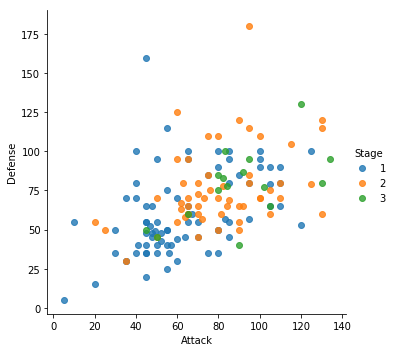

In [8]:
# set hue to the evolution stage of each Pokemon
sns.lmplot(x="Attack", y="Defense", data=df_pokemon,
          fit_reg=False,
          hue="Stage")

# Customise your plot using `matplotlib`

(-50, 141.9881096001028)

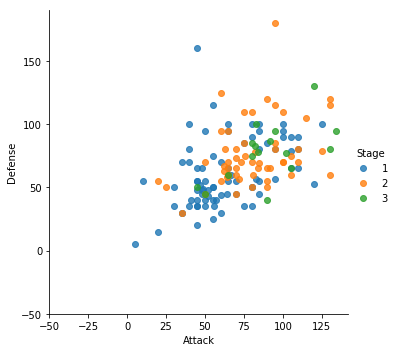

In [9]:
sns.lmplot(x="Attack", y="Defense", data=df_pokemon,
          fit_reg=False,
          hue="Stage")

plt.ylim(-50, None)
plt.xlim(-50, None)

# Preformat a DataFrame for seaborn

In some instances, you may want to select the data to plot using `pandas` instead of trying to do this in `seaborn`.
Following is an example of a bar plot that includes unecessary columns. The second bar plot shows how we focus the plot on only relevant data.

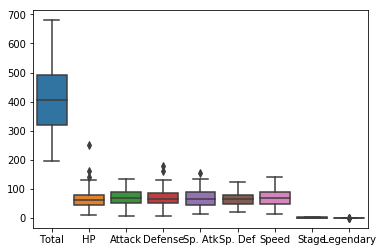

In [10]:
cleanup()

# bad box plot
sns.boxplot(data=df_pokemon)

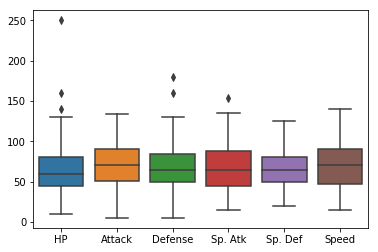

In [11]:
cleanup()

# good box plot
relevant_stats_df = df_pokemon.drop(["Total", "Stage", "Legendary"], axis=1)
sns.boxplot(data=relevant_stats_df)

# Setting themes

[python gallery #104](https://python-graph-gallery.com/104-seaborn-themes/)

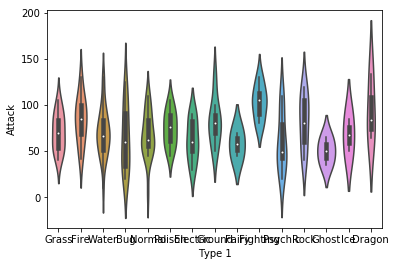

In [12]:
cleanup()

# default theme
sns.violinplot(x="Type 1", y="Attack", data=df_pokemon)

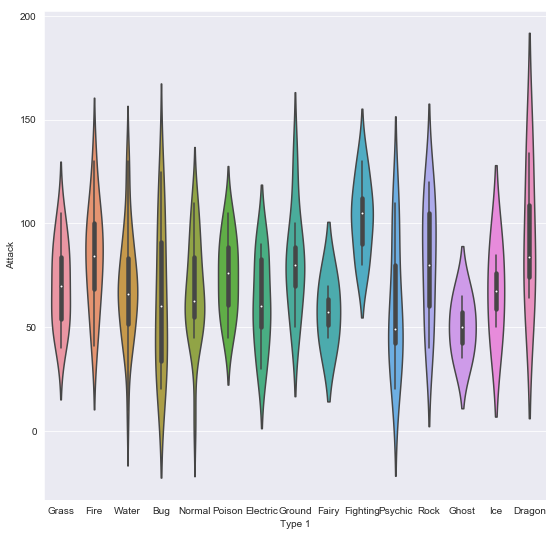

In [13]:
cleanup()

# darkgrid theme
sns.set_style("darkgrid")

# modifying figure size
fig, ax = plt.subplots(figsize=(9, 9))

sns.violinplot(ax=ax, x="Type 1", y="Attack", data=df_pokemon)

# Setting a custom colour palette

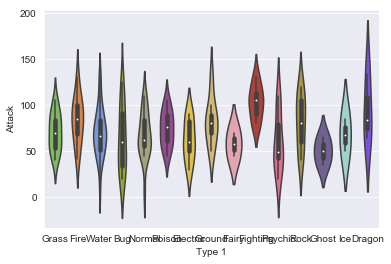

In [14]:
cleanup()

pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

sns.violinplot(x="Type 1", 
               y="Attack", 
               data=df_pokemon, 
              palette=pkmn_type_colors)

# Overlaying plots

Text(0.5, 1.0, 'Attack by Type')

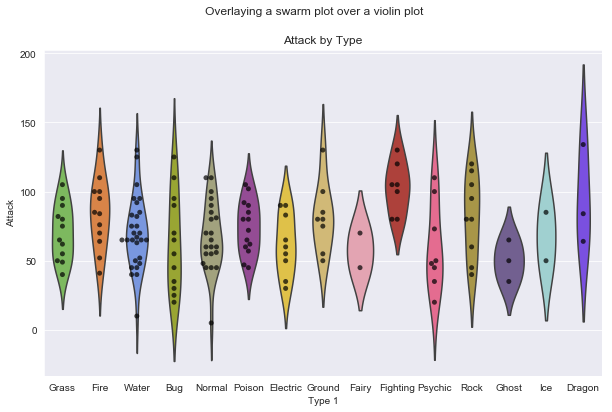

In [15]:
cleanup()

plt.figure(figsize=(10, 6))

# violin plot without bars inside violins
sns.violinplot(x="Type 1", 
               y="Attack", 
               data=df_pokemon, 
               inner=None, 
               palette=pkmn_type_colors)

sns.swarmplot(x="Type 1", 
             y="Attack", 
             data=df_pokemon,
             color="k",
             alpha=0.7)

plt.suptitle("Overlaying a swarm plot over a violin plot")
plt.title("Attack by Type")

# Seaborn count plot

A bar plot is called a count plot in seaborn. Useful to visualise nominal and ordinal categorical data with a limited set of values. 

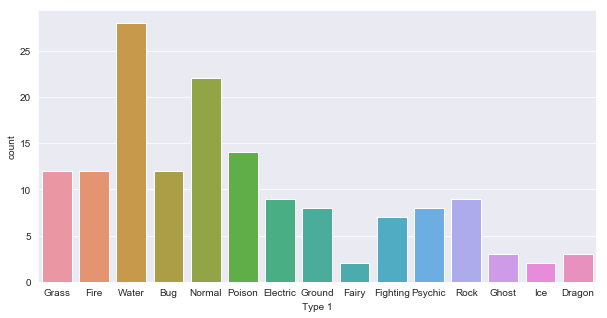

In [16]:
cleanup()

plt.figure(figsize=(10, 5))
sns.countplot(df_pokemon["Type 1"])

# Seaborn kde plot

Useful for using kernel density estimation to plot continuous variables. Does not necessarily make sense to use with categorical data as it will fit the line to data that does not exist. That is, it will smooth a line to data points that lie beteween two categories even though they do not exist, such as a grade between A and B or 10.5 points in a system in which you only assign integers to points. 

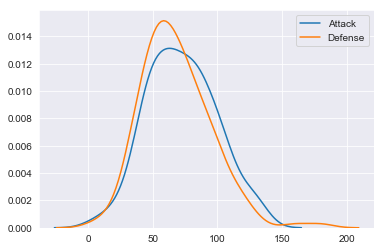

In [17]:
cleanup()

sns.kdeplot(df_pokemon.Attack)
sns.kdeplot(df_pokemon.Defense)

# Using a kde plot in two dimensions

A computationally intensive alternative to scatter plots and hex plots.

/anaconda3/envs/py362scipy/lib/python3.6/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


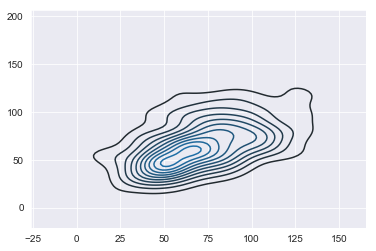

In [18]:
cleanup()

sns.kdeplot(df_pokemon[df_pokemon.Legendary == False].loc[:, ["Attack", "Defense"]])

# Seaborn distplot

Seaborn's take on a histogram.

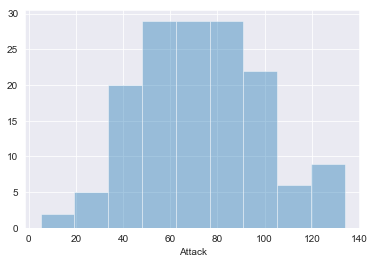

In [19]:
cleanup()
sns.distplot(df_pokemon.Attack, kde=False)

# joint plot and hexagon bin plot

A joint plot is seaborn's fancy version of a scatter plot that comes with correlation coefficients displayed as histogram bars alongside the data they represent. 

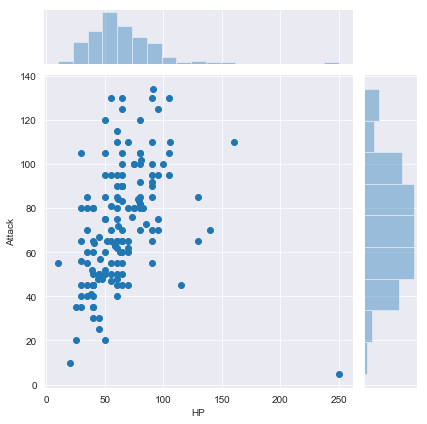

In [20]:
cleanup()
sns.jointplot(x="HP", y="Attack", data=df_pokemon)

A hexagon bin plot is an alternative to a scatter plot that you can use when your data is too dense for a scatter plot (i.e. too many data points overlap). It divides the space of the plot into hexagonal bins and use colour intensity to indicate the density of data in that hex bin. The two-dimensional plane is uniformly divided by hexagons and the number of dta points within each hexagon/bin are counted. The hexagons are coloured using a heatmap according to the proportion of the data points they contain. 

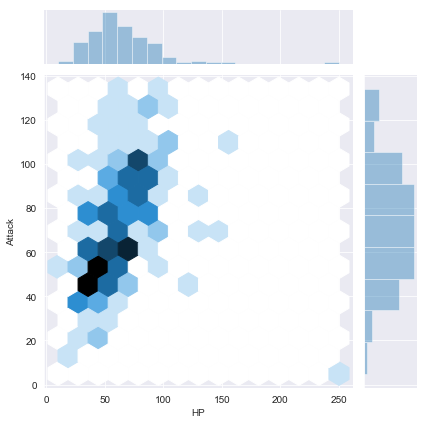

In [21]:
cleanup()
sns.jointplot(x="HP", y="Attack", kind="hex", data=df_pokemon)

# Despining

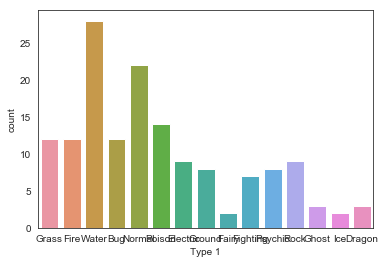

In [22]:
# with spines
cleanup()
sns.set_style("white")
sns.countplot(df_pokemon["Type 1"])
#sns.despine(bottom=True, left=True)

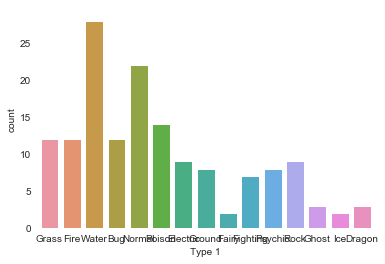

In [23]:
# removing spines on bottom and on left side
cleanup()
sns.countplot(df_pokemon["Type 1"])
sns.despine(bottom=True, left=True)

# Scaling fonts

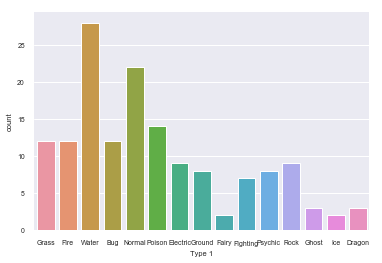

In [24]:
cleanup()
sns.set(font_scale=0.63)
sns.countplot(df_pokemon["Type 1"])
sns.despine(bottom=True, left=True)

# Using a simple `FacetGrid`

For example, compare the `HP` for two of the `Type 1` values.

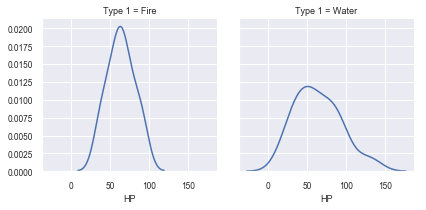

In [26]:
cleanup()
df1 = df_pokemon[df_pokemon["Type 1"].isin(["Fire", "Water"])]
sns.set(font_scale=0.75)
fg = sns.FacetGrid(data=df1, col="Type 1")
fg.map(sns.kdeplot, "HP")

# Configuring columns in a `FacetGrid`

For example, compare HP for all values of the `Type 1` categorical variable.

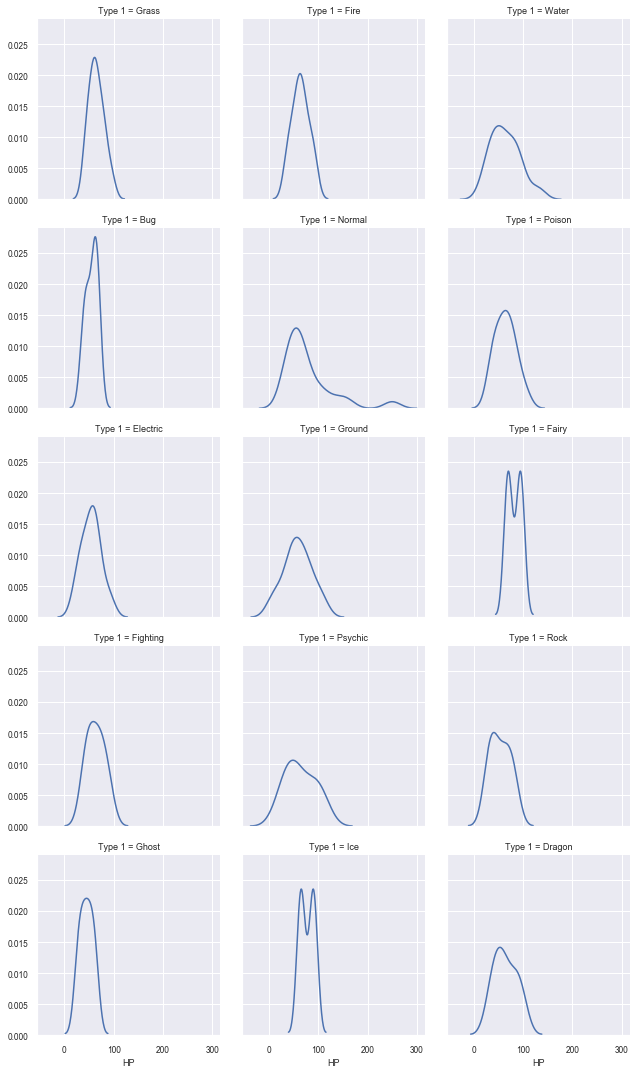

In [27]:
cleanup()
sns.set(font_scale=0.75)
fg = sns.FacetGrid(data=df_pokemon, col="Type 1", col_wrap=3)
fg.map(sns.kdeplot, "HP")

# Configuring rows (and columns) in a `FacetGrid`

We can organise two categorical variables using a `FacetGrid`. One of the categorical variables is organised by rows and the other one by columns.

/anaconda3/envs/py362scipy/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/envs/py362scipy/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/envs/py362scipy/lib/python3.6/site-packages/statsmodels/nonparametric/bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
/anaconda3/envs/py362scipy/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


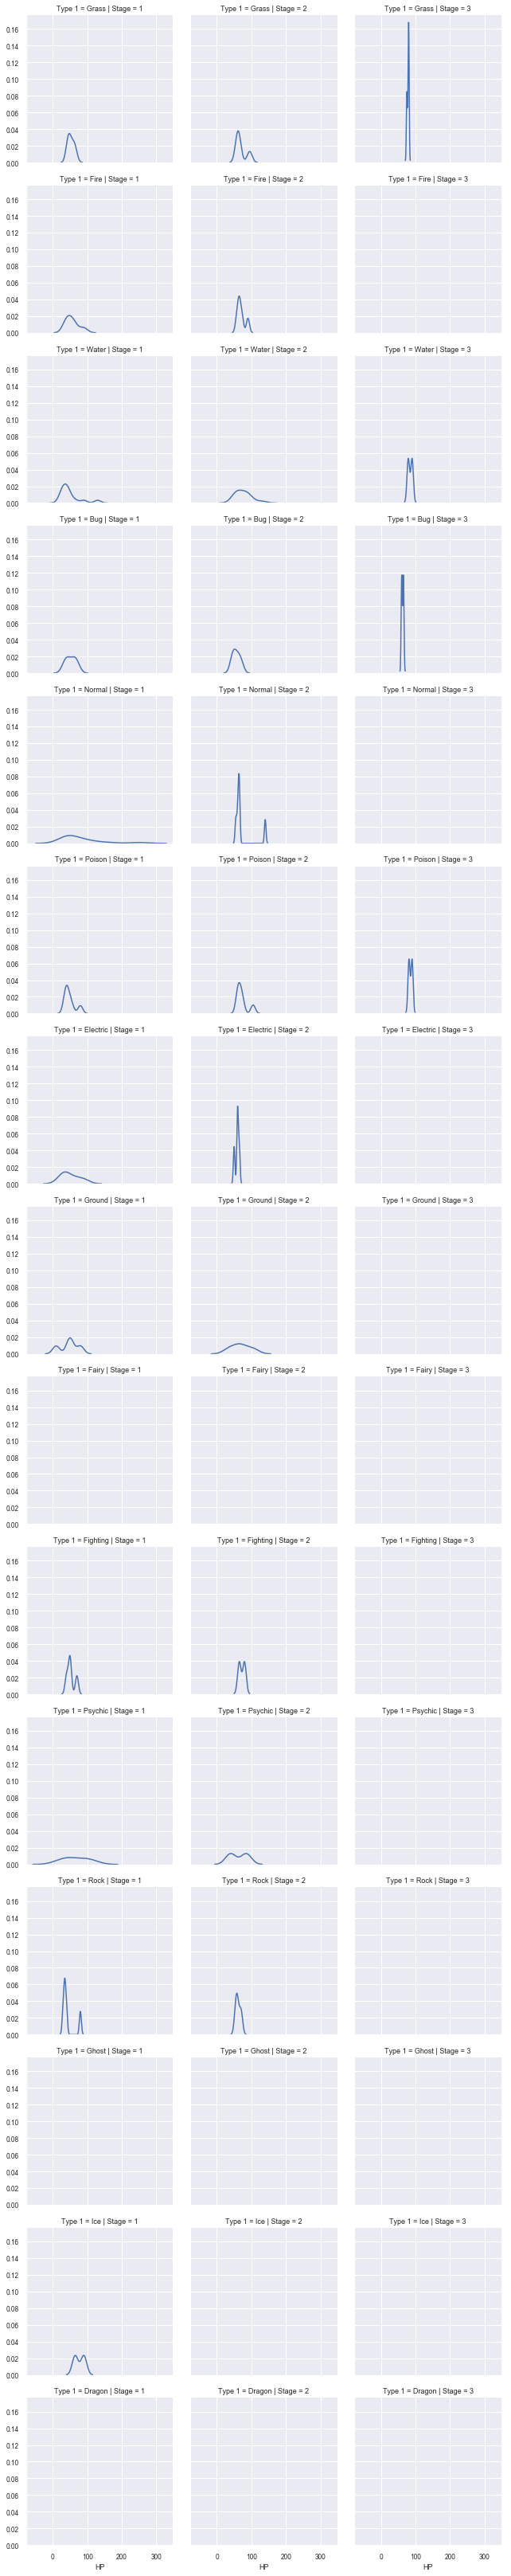

In [28]:
cleanup()
sns.set(font_scale=0.75)
fg = sns.FacetGrid(data=df_pokemon, row="Type 1", col="Stage")
fg.map(sns.kdeplot, "HP")

Or just by rows:

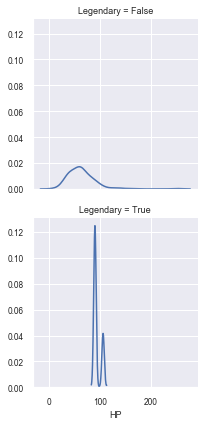

In [29]:
cleanup()
sns.set(font_scale=0.75)
fg = sns.FacetGrid(data=df_pokemon, row="Legendary")
fg.map(sns.kdeplot, "HP")

# Pair plots

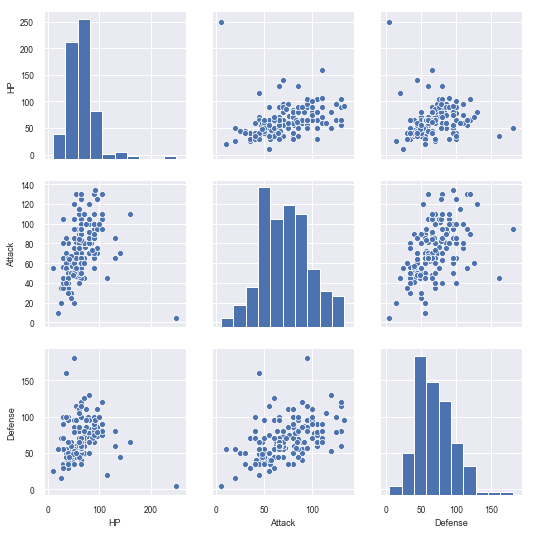

In [30]:
cleanup()
sns.pairplot(df_pokemon[["HP", "Attack", "Defense"]])

# Using shapes in multi-variate plots

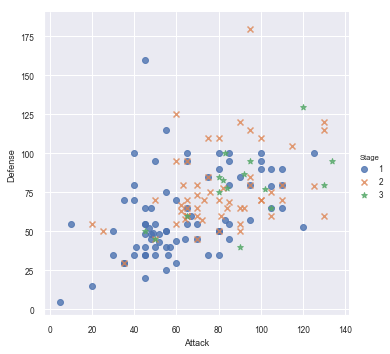

In [31]:
cleanup()
sns.lmplot(x="Attack", 
           y="Defense", 
           data=df_pokemon,
           fit_reg=False,
           hue="Stage",
           markers=["o", "x", "*"])

# Grouped box plots

Grouping box plots by the values of a categorical variable can be quite useful to gain insights (i.e. later stages tend to have  higher HP), they tend to get crowded and are only good for small numbers of categorical values (i.e. we use three types and Stage, which has three values).

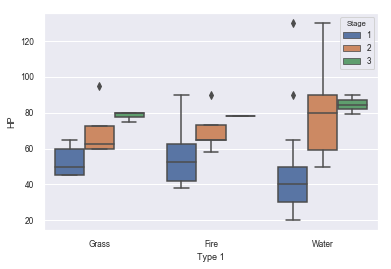

In [32]:
cleanup()
df2 = df_pokemon[df_pokemon["Type 1"].isin(["Grass", "Fire", "Water"])]
sns.boxplot(data=df2, x="Type 1", y="HP", hue="Stage")

# Heatmap

Seaborn heatmaps can be used to visualise pair-wise correlations among multiple variables. 

In [33]:
df3 = df_pokemon.loc[:, ["Total", "HP", "Attack", "Defense"]].dropna().corr()
df3.head()

,Total,HP,Attack,Defense
Total,1.000000,0.576591,0.670939,0.508694
HP,0.576591,1.000000,0.306768,0.119782
Attack,0.670939,0.306768,1.000000,0.491965
Defense,0.508694,0.119782,0.491965,1.000000


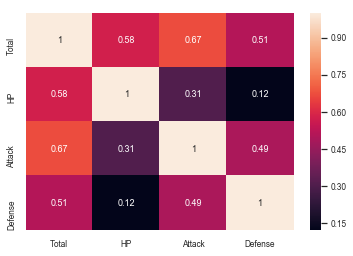

In [34]:
cleanup()
sns.heatmap(data=df3, annot=True)